In [1]:
import sys

module_dir = '../'

if module_dir not in sys.path:
    sys.path.append(module_dir)

import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from models import *
import test_systems_1d as systems_1d
import itertools
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import NoNorm
from tqdm import tqdm
import gpjax as gpx
import jax.random as jr
import jax.numpy as jnp

/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


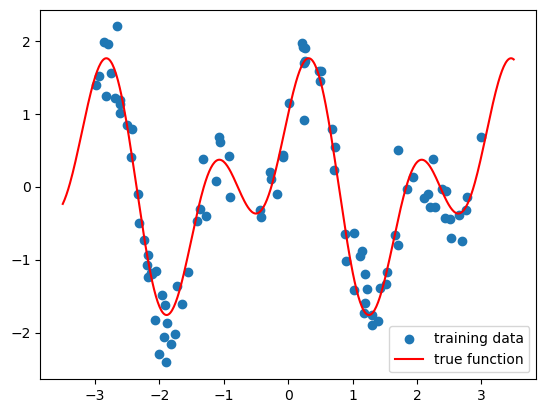

In [2]:
# generate training and testing data

key = jr.key(123)

n = 100
noise = 0.3

key, subkey = jr.split(key)
x = jr.uniform(key=key, minval=-3.0, maxval=3.0, shape=(n,)).reshape(-1, 1)
f = lambda x: jnp.sin(4 * x) + jnp.cos(2 * x)
signal = f(x)
y = signal + jr.normal(subkey, shape=signal.shape) * noise

# testing data

xtest = jnp.linspace(-3.5, 3.5, 500).reshape(-1, 1)
ytest = f(xtest)

plt.figure()
plt.scatter(x, y, label='training data')
plt.plot(xtest, ytest, 'r', label='true function')
plt.legend()
plt.show()

/Users/tomcowperthwaite/Documents/GitHub/MRes/notebooks/../models.py:73: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, n_samples)


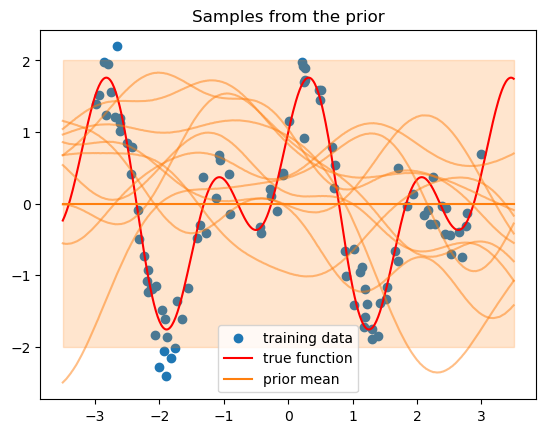

In [3]:
# generate samples from the prior

model = GP_regressor()
prior_mean, prior_cov, prior_samples = model.sample_prior(xtest, n_samples=10)

plt.figure()
plt.scatter(x, y, label='training data')
plt.plot(xtest, ytest, 'r', label='true function')
plt.plot(xtest, prior_samples.T, color='tab:orange', alpha=0.5)
plt.plot(xtest, prior_mean, 'tab:orange', label='prior mean')
plt.fill_between(xtest.flatten(), prior_mean - 2 * np.sqrt(np.diag(prior_cov)),
                 prior_mean + 2 * np.sqrt(np.diag(prior_cov)), color='tab:orange', alpha=0.2)
plt.title('Samples from the prior')
plt.legend()
plt.show()

/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/gpjax/dataset.py:44: UserWarning: X is not of type float64. Got X.dtype=float32. This may lead to numerical instability. 
  _check_precision(self.X, self.y)
/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/gpjax/dataset.py:44: UserWarning: y is not of type float64.Got y.dtype=float32. This may lead to numerical instability.
  _check_precision(self.X, self.y)
/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 54.014797
         Iterations: 10
         Function evaluations: 156
         Gradient evaluations: 144


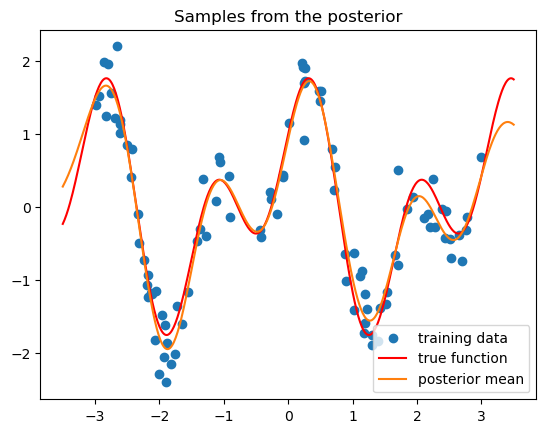

In [5]:
# fit GP

model.fit(x, y)

mean = model.predict(xtest)

plt.figure()
plt.scatter(x, y, label='training data')
plt.plot(xtest, ytest, 'r', label='true function')
plt.plot(xtest, mean, 'tab:orange', label='posterior mean')
# plt.fill_between(xtest.flatten(), mean - 2 * std, mean + 2 * std, color='tab:orange', alpha=0.2)
plt.title('Samples from the posterior')
plt.legend()
plt.show()